# Dataset Collection and Understanding
This project explores the dynamics of public opinion on the Reddit platform during major winter fires in the Los Angeles area in January 2025. The goal of the study will be to find out how the focus of discussions changes in response to extreme situations.




In [ ]:
import pandas as pd
from google.colab import drive
import glob
import os

#Initial Exploration

In [ ]:
csv_file = '/content/drive/MyDrive/Computational Sciences/cleaned_all_data.csv'
df = pd.read_csv(csv_file, parse_dates=['datetime'])

In [ ]:
df.head()

,comment_id,datetime,author,score,body,subreddit,link_id,permalink,government_mentioned,fire_mentioned,lafd_related,urban_planning_related,fabricated_fires_related,celebrity_related,ai_related,disinformation_related,antisemitic_related,weather_related,conspiracy_mentioned,humanitarian_aid_mentioned
0,lzsk65x,2024-12-01 00:00:00,Ikeelu,-11,"Not exactly, but it's not new either. Batterie...",news,t3_1h3p9ja,https://www.reddit.com/r/news/comments/1h3p9ja...,False,False,False,False,False,False,True,False,False,False,False,False
1,lzsk7i1,2024-12-01 00:00:13,blackace352,2,The first slave owner in America was Anthony J...,conspiracy,t3_1h3m1qb,https://www.reddit.com/r/conspiracy/comments/1...,False,False,False,False,False,False,False,False,False,False,False,False
2,lzsk7jb,2024-12-01 00:00:13,Jeff_Baezos,7,Was it the furniture store by Santa Ana Colleg...,orangecounty,t3_1h3j3fx,https://www.reddit.com/r/orangecounty/comments...,False,False,False,False,False,False,False,False,False,True,False,False
3,lzsk7v2,2024-12-01 00:00:16,cabs2kinkos,3,Burritos are not Mexican food. The burritos yo...,AskLosAngeles,t3_1h3jr6l,https://www.reddit.com/r/AskLosAngeles/comment...,False,False,False,False,False,False,False,False,False,False,False,False
4,lzsk7zp,2024-12-01 00:00:17,Fallom_,766,RIP. You'd have to be a fucking moron to let y...,news,t3_1h3p9ja,https://www.reddit.com/r/news/comments/1h3p9ja...,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3587384 entries, 0 to 3587383
Data columns (total 20 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   comment_id                  object        
 1   datetime                    datetime64[ns]
 2   author                      object        
 3   score                       int64         
 4   body                        object        
 5   subreddit                   object        
 6   link_id                     object        
 7   permalink                   object        
 8   government_mentioned        bool          
 9   fire_mentioned              bool          
 10  lafd_related                bool          
 11  urban_planning_related      bool          
 12  fabricated_fires_related    bool          
 13  celebrity_related           bool          
 14  ai_related                  bool          
 15  disinformation_related      bool          
 16  antisemitic_relate

In [ ]:
rows, columns = df.shape
print(f"Dataset has {rows} rows and {columns} columns")

Dataset has 3587384 rows and 20 columns


In [ ]:
category_columns = ['government_mentioned', 'fire_mentioned', 'lafd_related',
                       'urban_planning_related', 'fabricated_fires_related',
                       'celebrity_related', 'ai_related', 'disinformation_related',
                       'antisemitic_related', 'weather_related',
                       'conspiracy_mentioned', 'humanitarian_aid_mentioned']
category_counts = df[category_columns].sum().sort_values(ascending=False)
category_counts

,0
ai_related,770239
government_mentioned,673047
humanitarian_aid_mentioned,237279
fire_mentioned,174576
urban_planning_related,103904
conspiracy_mentioned,76295
weather_related,47920
celebrity_related,26868
antisemitic_related,23898
disinformation_related,23371


In [ ]:
total_rows = len(df)
overview = pd.DataFrame({
    'Count': df[category_columns].sum(),
    'Percentage': df[category_columns].mean() * 100
}).sort_values(by='Count', ascending=False)

overview


,Count,Percentage
ai_related,770239,21.470771
government_mentioned,673047,18.761499
humanitarian_aid_mentioned,237279,6.614263
fire_mentioned,174576,4.866387
urban_planning_related,103904,2.896372
conspiracy_mentioned,76295,2.126759
weather_related,47920,1.335792
celebrity_related,26868,0.748958
antisemitic_related,23898,0.666168
disinformation_related,23371,0.651478


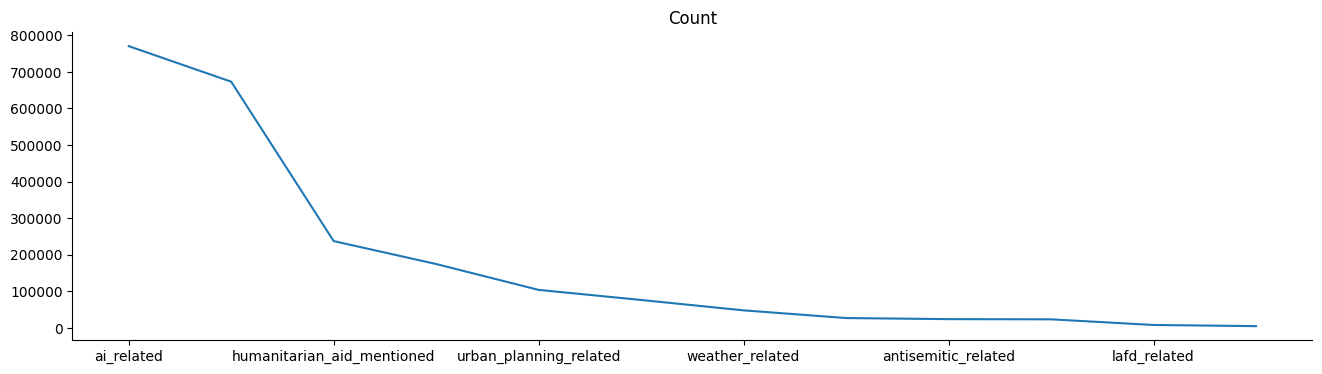

In [ ]:
from matplotlib import pyplot as plt
overview['Count'].plot(kind='line', figsize=(16, 4), title='Count')
plt.gca().spines[['top', 'right']].set_visible(False)